# Twitch Data Cleaning and EDA

Chao Shi

5/7/2017

@NYC Data Science Academy

chao.shi.datasci at gmail dot com

## Overview

14000+ rows of twitch channel info and 2000+ rows of twitch team info are scraped from https://www.twitchtools.com

Here we perform the data cleaning and EDA steps. Eventually the channel-team interaction is planned to be shown with interactive graphs, so the 'node' and 'edge' data are being prepared here.

In [3]:
%matplotlib inline

In [4]:
# import packages
import numpy as np
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
cd data_safe

/Users/chao/git_proj/scrapy_ttools/data_safe


In [6]:
ls

channelsinfo_clean.csv        twitchtools_channels.csv
teamsinfo_clean.csv           twitchtools_channelsinfo.csv
testc2g.csv                   twitchtools_teams.csv
testg2c.csv                   twitchtools_teamsinfo.csv


In [7]:
# load scraped data
channels     = pd.read_csv('twitchtools_channels.csv')
channelsinfo = pd.read_csv('twitchtools_channelsinfo.csv')
teams     = pd.read_csv('twitchtools_teams.csv')
teamsinfo = pd.read_csv('twitchtools_teamsinfo.csv')

In [8]:
channels.head()

,username,thumbnail,nfollowers,subfolder
0,RouzVega,https://static-cdn.jtvnw.net/jtv_user_pictures...,"58,290 followers",/channel/rouzvega
1,manuelferraratv,https://static-cdn.jtvnw.net/jtv_user_pictures...,"58,248 followers",/channel/manuelferraratv
2,ESPORTNOW,https://static-cdn.jtvnw.net/jtv_user_pictures...,"58,188 followers",/channel/esportnow
3,Princess_PwnZ,https://static-cdn.jtvnw.net/jtv_user_pictures...,"58,171 followers",/channel/princess_pwnz
4,Tempo_Storm,https://static-cdn.jtvnw.net/jtv_user_pictures...,"58,102 followers",/channel/tempo_storm


In [9]:
# print channelsinfo.dtypes
# print channelsinfo.describe()
# channelsinfo.columns.values.tolist()
channelsinfo.head()

,twitch_partner_flag,page_url,display_name,account_updated_date,teams_joined,last_game,channel_followers,account_unique_id,twitch_url,channel_views,mature_flag,account_created_date
0,Yes,https://www.twitchtools.com/channel/rouzvega,RouzVega,"May 7, 2017, 14:34 GMT+0000",did not join any team,League of Legends,"58,290",71397506,https://www.twitch.tv/rouzvega,"882,208",No,"September 17, 2014, 13:27 GMT+0000"
1,Yes,https://www.twitchtools.com/channel/manuelferr...,manuelferraratv,"May 7, 2017, 08:34 GMT+0000",did not join any team,H1Z1: King of the Kill,"58,248",131861345,https://www.twitch.tv/manuelferraratv,"1,420,836",Yes,"August 10, 2016, 19:53 GMT+0000"
2,Yes,https://www.twitchtools.com/channel/esportnow,ESPORTNOW,"May 7, 2017, 14:35 GMT+0000",Polskie Strumyki;FantasyEXPO,Counter-Strike: Global Offensive,"58,188",89881921,https://www.twitch.tv/esportnow,"8,242,040",No,"April 30, 2015, 13:44 GMT+0000"
3,Yes,https://www.twitchtools.com/channel/princess_pwnz,Princess_PwnZ,"May 7, 2017, 17:06 GMT+0000",did not join any team,PLAYERUNKNOWN'S BATTLEGROUNDS,"58,171",103710103,https://www.twitch.tv/princess_pwnz,"837,150",Yes,"October 4, 2015, 22:33 GMT+0000"
4,Yes,https://www.twitchtools.com/channel/tempo_storm,Tempo_Storm,"May 7, 2017, 14:32 GMT+0000",Tempo Storm,Hearthstone,"58,102",79579372,https://www.twitch.tv/tempo_storm,"4,029,937",No,"January 11, 2015, 20:35 GMT+0000"


In [10]:
channelsinfo.columns

Index([u'twitch_partner_flag', u'page_url', u'display_name',
       u'account_updated_date', u'teams_joined', u'last_game',
       u'channel_followers', u'account_unique_id', u'twitch_url',
       u'channel_views', u'mature_flag', u'account_created_date'],
      dtype='object')

In [11]:
channelsinfo.shape

(14741, 12)

In [12]:
# change Yes/No columns to boolean column for convenience
channelsinfo.twitch_partner_flag[channelsinfo.twitch_partner_flag == 'Yes'] = True
channelsinfo.twitch_partner_flag[channelsinfo.twitch_partner_flag == 'No']  = False
channelsinfo.mature_flag[channelsinfo.mature_flag == 'Yes'] = True
channelsinfo.mature_flag[channelsinfo.mature_flag == 'No']  = False

# change number columns from str to int (remove comma)
channelsinfo.channel_followers = map(lambda s: int("".join(s.split(','))), channelsinfo.channel_followers)
channelsinfo.channel_views     = map(lambda s: int("".join(s.split(','))), channelsinfo.channel_views)

/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__

In [13]:
channelsinfo

,twitch_partner_flag,page_url,display_name,account_updated_date,teams_joined,last_game,channel_followers,account_unique_id,twitch_url,channel_views,mature_flag,account_created_date
0,True,https://www.twitchtools.com/channel/rouzvega,RouzVega,"May 7, 2017, 14:34 GMT+0000",did not join any team,League of Legends,58290,71397506,https://www.twitch.tv/rouzvega,882208,False,"September 17, 2014, 13:27 GMT+0000"
1,True,https://www.twitchtools.com/channel/manuelferr...,manuelferraratv,"May 7, 2017, 08:34 GMT+0000",did not join any team,H1Z1: King of the Kill,58248,131861345,https://www.twitch.tv/manuelferraratv,1420836,True,"August 10, 2016, 19:53 GMT+0000"
2,True,https://www.twitchtools.com/channel/esportnow,ESPORTNOW,"May 7, 2017, 14:35 GMT+0000",Polskie Strumyki;FantasyEXPO,Counter-Strike: Global Offensive,58188,89881921,https://www.twitch.tv/esportnow,8242040,False,"April 30, 2015, 13:44 GMT+0000"
3,True,https://www.twitchtools.com/channel/princess_pwnz,Princess_PwnZ,"May 7, 2017, 17:06 GMT+0000",did not join any team,PLAYERUNKNOWN'S BATTLEGROUNDS,58171,103710103,https://www.twitch.tv/princess_pwnz,837150,True,"October 4, 2015, 22:33 GMT+0000"
4,True,https://www.twitchtools.com/channel/tempo_storm,Tempo_Storm,"May 7, 2017, 14:32 GMT+0000",Tempo Storm,Hearthstone,58102,79579372,https://www.twitch.tv/tempo_storm,4029937,False,"January 11, 2015, 20:35 GMT+0000"
5,True,https://www.twitchtools.com/channel/frodan,Frodan,"May 7, 2017, 16:02 GMT+0000",Tempo Storm,Hearthstone,58050,13576693,https://www.twitch.tv/frodan,1422397,False,"July 7, 2010, 03:14 GMT+0000"
6,True,https://www.twitchtools.com/channel/scudpunk,scudpunk,"May 7, 2017, 14:30 GMT+0000",rustNchill.com;DBH;The Madhouse;SpicyBoys,Rust,58006,72572503,https://www.twitch.tv/scudpunk,1800907,True,"October 6, 2014, 19:51 GMT+0000"
7,True,https://www.twitchtools.com/channel/jennyeatsb...,jennyeatsbabies,"May 7, 2017, 14:30 GMT+0000",did not join any team,League of Legends,57996,30569155,https://www.twitch.tv/jennyeatsbabies,3302820,False,"May 16, 2012, 00:32 GMT+0000"
8,True,https://www.twitchtools.com/channel/stressleve...,StressLevelZero,"May 7, 2017, 08:31 GMT+0000",did not join any team,Creative,57995,68697522,https://www.twitch.tv/stresslevelzero,748444,False,"August 11, 2014, 06:25 GMT+0000"
9,True,https://www.twitchtools.com/channel/scufjumpn,ScufJumpn,"May 7, 2017, 15:01 GMT+0000",Denial eSports,H1Z1: King of the Kill,57931,64284181,https://www.twitch.tv/scufjumpn,313584,True,"June 13, 2014, 15:04 GMT+0000"


In [14]:
# unplanned cleaning step due to scraping issue -- When N/A happens, sometimes my scrapping code put info in wrong columns
# luckily no real info is missing, a shift here solves the issue
# lesson here is to start using json or mongoDB to help align unstructured data
channelsinfo.last_game.str.startswith('\n\t\t').sum()
ind_no_lg = channelsinfo.last_game.str.startswith('\n\t\t')

channelsinfo.loc[ind_no_lg,"twitch_url"] = channelsinfo.loc[ind_no_lg,"account_updated_date"]
channelsinfo.loc[ind_no_lg,"account_updated_date"] = channelsinfo.loc[ind_no_lg,"account_created_date"].str.strip()
channelsinfo.loc[ind_no_lg,"account_created_date"] = channelsinfo.loc[ind_no_lg,"last_game"].str.strip()
channelsinfo.loc[ind_no_lg,"last_game"] = 'Unspec'

In [15]:
# note to self: str.replace is different from pd.replace
engid = channelsinfo.twitch_url.str.replace('https://www.twitch.tv/','')
channelsinfo = channelsinfo.assign(engid=engid.values)

In [16]:
# change time info from str to datatime. this is needed since I want to caculate  days = date2 - date1
channelsinfo.account_created_date = [s.replace(' GMT+0000','') for s in channelsinfo.account_created_date]
channelsinfo.account_updated_date = [s.replace(' GMT+0000','') for s in channelsinfo.account_updated_date]

channelsinfo.account_created_date = map(lambda s: datetime.strptime(s, '%B %d, %Y, %H:%M'), channelsinfo.account_created_date)
channelsinfo.account_updated_date = map(lambda s: datetime.strptime(s, '%B %d, %Y, %H:%M'), channelsinfo.account_updated_date)
channelsinfo['channel_exist_time'] = channelsinfo.account_updated_date - channelsinfo.account_created_date

In [17]:
# I decided to keep hour and minute info for whatever reason, therefore generating another 'days' column
# this data set is small, so extra space for time reduction later is ok with me.
channelsinfo['channel_days'] = [time.days for time in channelsinfo.channel_exist_time]

In [18]:
# finally...
channelsinfo['view_per_follower'] = channelsinfo.channel_views / channelsinfo.channel_followers
channelsinfo['view_per_day']      = channelsinfo.channel_views / channelsinfo.channel_days
channelsinfo['follower_per_day']  = channelsinfo.channel_followers / channelsinfo.channel_days
channelsinfo['view_per_follower_per_day'] = channelsinfo.channel_views / channelsinfo.channel_followers / channelsinfo.channel_days

In [19]:
channelsinfo.head()

,twitch_partner_flag,page_url,display_name,account_updated_date,teams_joined,last_game,channel_followers,account_unique_id,twitch_url,channel_views,mature_flag,account_created_date,engid,channel_exist_time,channel_days,view_per_follower,view_per_day,follower_per_day,view_per_follower_per_day
0,True,https://www.twitchtools.com/channel/rouzvega,RouzVega,2017-05-07 14:34:00,did not join any team,League of Legends,58290,71397506,https://www.twitch.tv/rouzvega,882208,False,2014-09-17 13:27:00,rouzvega,963 days 01:07:00,963,15.134809,916.103842,60.529595,0.015716
1,True,https://www.twitchtools.com/channel/manuelferr...,manuelferraratv,2017-05-07 08:34:00,did not join any team,H1Z1: King of the Kill,58248,131861345,https://www.twitch.tv/manuelferraratv,1420836,True,2016-08-10 19:53:00,manuelferraratv,269 days 12:41:00,269,24.392872,5281.918216,216.535316,0.090680
2,True,https://www.twitchtools.com/channel/esportnow,ESPORTNOW,2017-05-07 14:35:00,Polskie Strumyki;FantasyEXPO,Counter-Strike: Global Offensive,58188,89881921,https://www.twitch.tv/esportnow,8242040,False,2015-04-30 13:44:00,esportnow,738 days 00:51:00,738,141.645013,11168.075881,78.845528,0.191931
3,True,https://www.twitchtools.com/channel/princess_pwnz,Princess_PwnZ,2017-05-07 17:06:00,did not join any team,PLAYERUNKNOWN'S BATTLEGROUNDS,58171,103710103,https://www.twitch.tv/princess_pwnz,837150,True,2015-10-04 22:33:00,princess_pwnz,580 days 18:33:00,580,14.391191,1443.362069,100.294828,0.024812
4,True,https://www.twitchtools.com/channel/tempo_storm,Tempo_Storm,2017-05-07 14:32:00,Tempo Storm,Hearthstone,58102,79579372,https://www.twitch.tv/tempo_storm,4029937,False,2015-01-11 20:35:00,tempo_storm,846 days 17:57:00,846,69.359695,4763.518913,68.678487,0.081985


In [20]:
top_30_games_channel_ct = channelsinfo.groupby('last_game')['last_game'].count().sort_values(ascending=False)[range(30)]
top_30_games = top_30_games_channel_ct.index

channelsinfo.last_game[-channelsinfo.last_game.isin(top_30_games)] = 'Less Popular Games'

/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## EDA -- fun time

In [21]:
# removing outliers
channelsinfo = channelsinfo.loc[channelsinfo.engid != 'steven_bonnell_ii',:]
channelsinfo.sort_values('view_per_follower',ascending=False).head()
# plt.hist(channelsinfo.view_per_follower, bins=20, range=[0,max(channelsinfo.view_per_follower)])

,twitch_partner_flag,page_url,display_name,account_updated_date,teams_joined,last_game,channel_followers,account_unique_id,twitch_url,channel_views,mature_flag,account_created_date,engid,channel_exist_time,channel_days,view_per_follower,view_per_day,follower_per_day,view_per_follower_per_day
1628,False,https://www.twitchtools.com/channel/cold,Cold,2017-05-05 21:31:00,did not join any team,Overwatch,160,399787,https://www.twitch.tv/cold,1584076,False,2008-04-04 12:58:00,cold,3318 days 08:33:00,3318,9900.475000,477.418927,0.048222,2.983868
10968,True,https://www.twitchtools.com/channel/xangold,Xangold,2017-05-07 14:32:00,Twitch Staff;TwitchRaid;Shytomb's List Of Real...,Overwatch,12206,39141793,https://www.twitch.tv/xangold,101055071,False,2008-01-08 01:01:00,xangold,3407 days 13:31:00,3407,8279.130837,29661.012915,3.582624,2.430035
8966,True,https://www.twitchtools.com/channel/lordkat,Lordkat,2017-05-07 16:06:00,LordKaT Mafia,Grand Theft Auto V,4782,151846,https://www.twitch.tv/lordkat,16976812,True,2007-10-28 06:15:00,lordkat,3479 days 09:51:00,3479,3550.148892,4879.796493,1.374533,1.020451
5368,False,https://www.twitchtools.com/channel/rakakase,Rakakase,2017-05-06 19:02:00,did not join any team,Unspec,872,8015472,https://www.twitch.tv/rakakase,3071656,False,2009-08-29 18:08:00,rakakase,2807 days 00:54:00,2807,3522.541284,1094.284289,0.310652,1.254913
10008,True,https://www.twitchtools.com/channel/maruhashi084,maruhashi084,2017-05-07 16:03:00,did not join any team,Destiny,7885,57427078,https://www.twitch.tv/maruhashi084,19354588,False,2014-02-22 10:00:00,maruhashi084,1170 days 06:03:00,1170,2454.608497,16542.382906,6.739316,2.097956


(array([  1.44660000e+04,   1.88000000e+02,   4.50000000e+01,
          1.90000000e+01,   1.00000000e+01,   5.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([  1.01000000e+02,   2.43637700e+05,   4.87174400e+05,
          7.30711100e+05,   9.74247800e+05,   1.21778450e+06,
          1.46132120e+06,   1.70485790e+06,   1.94839460e+06,
          2.19193130e+06,   2.43546800e+06]),
 <a list of 10 Patch objects>)

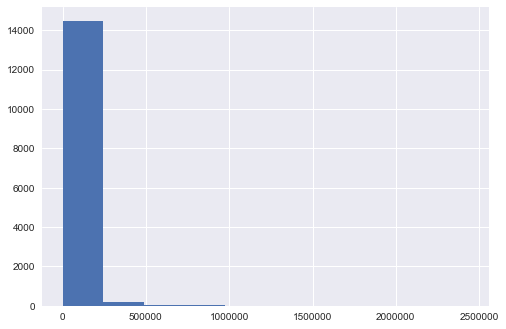

In [22]:
plt.hist(channelsinfo.channel_followers, bins=10)

(array([  1.46470000e+04,   5.80000000e+01,   1.70000000e+01,
          1.10000000e+01,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  3.00000000e+00,   4.47339683e+07,   8.94679336e+07,
          1.34201899e+08,   1.78935864e+08,   2.23669830e+08,
          2.68403795e+08,   3.13137760e+08,   3.57871725e+08,
          4.02605691e+08,   4.47339656e+08,   4.92073621e+08,
          5.36807587e+08,   5.81541552e+08,   6.26275517e+08,
          6.71009482e+08,   7.15743448e+08,   7.60477413e+08,
          8.05211378e+08,   8.49945344e+08,   8.94679309e+08]),
 <a list of 20 Patch objects>)

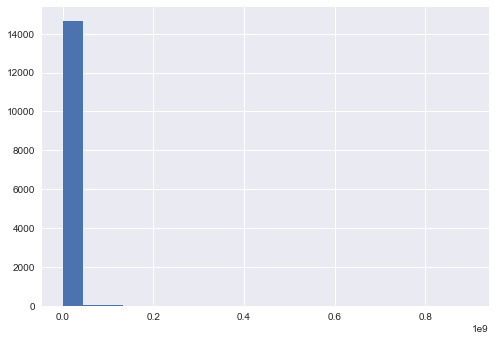

In [23]:
plt.hist(channelsinfo.channel_views, bins=20)

(array([  353.,   846.,  1116.,  1189.,  1574.,  1346.,  1479.,  1271.,
         1303.,  1078.,   934.,   725.,   465.,   239.,   186.,   199.,
          145.,   105.,    74.,   113.]),
 array([   11.  ,   192.35,   373.7 ,   555.05,   736.4 ,   917.75,
         1099.1 ,  1280.45,  1461.8 ,  1643.15,  1824.5 ,  2005.85,
         2187.2 ,  2368.55,  2549.9 ,  2731.25,  2912.6 ,  3093.95,
         3275.3 ,  3456.65,  3638.  ]),
 <a list of 20 Patch objects>)

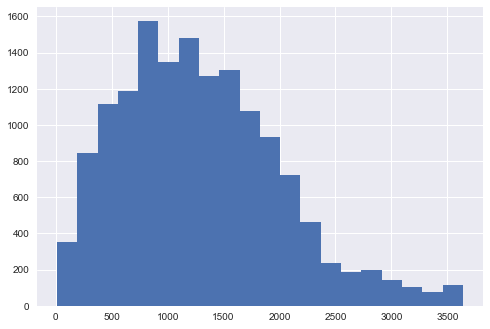

In [24]:
plt.hist(channelsinfo.channel_days, bins=20)

(array([  1.43490000e+04,   2.54000000e+02,   7.10000000e+01,
          2.70000000e+01,   1.00000000e+01,   7.00000000e+00,
          7.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          4.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  2.83200440e-02,   1.39921904e+02,   2.79815488e+02,
          4.19709072e+02,   5.59602656e+02,   6.99496240e+02,
          8.39389824e+02,   9.79283408e+02,   1.11917699e+03,
          1.25907058e+03,   1.39896416e+03,   1.53885774e+03,
          1.67875133e+03,   1.81864491e+03,   1.95853850e+03,
          2.09843208e+03,   2.23832566e+03,   2.37821925e+03,
          2.51811283e+03,   2.65800642e+03,   2.79790000e+03]),
 <a list of 20 Patch objects>)

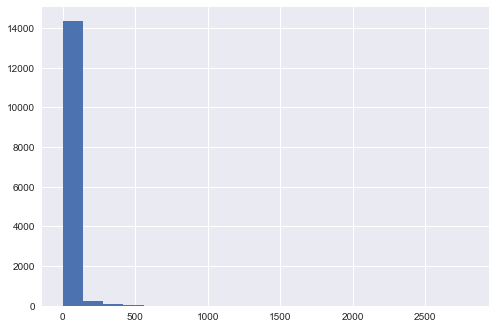

In [25]:
plt.hist(channelsinfo.follower_per_day, bins=20)

(array([  1.46410000e+04,   5.80000000e+01,   1.80000000e+01,
          1.00000000e+01,   7.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00]),
 array([  1.04239055e-03,   2.62831769e+04,   5.25663528e+04,
          7.88495287e+04,   1.05132705e+05,   1.31415880e+05,
          1.57699056e+05,   1.83982232e+05,   2.10265408e+05,
          2.36548584e+05,   2.62831760e+05,   2.89114936e+05,
          3.15398112e+05,   3.41681288e+05,   3.67964463e+05,
          3.94247639e+05,   4.20530815e+05,   4.46813991e+05,
          4.73097167e+05,   4.99380343e+05,   5.25663519e+05]),
 <a list of 20 Patch objects>)

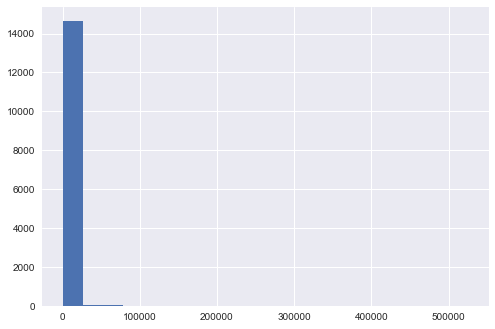

In [26]:
plt.hist(channelsinfo.view_per_day, bins=20)

(array([  1.41150000e+04,   3.78000000e+02,   1.18000000e+02,
          5.90000000e+01,   2.90000000e+01,   1.00000000e+01,
          6.00000000e+00,   4.00000000e+00,   4.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00]),
 array([ 0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,  1.05,  1.2 ,
         1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,  2.4 ,  2.55,
         2.7 ,  2.85,  3.  ]),
 <a list of 20 Patch objects>)

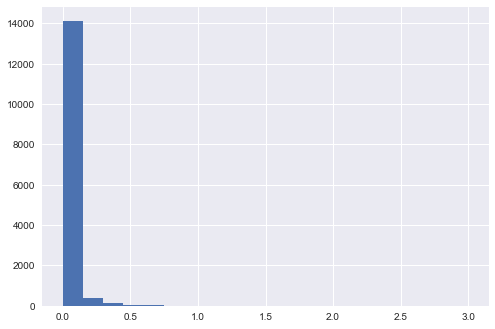

In [27]:
plt.hist(channelsinfo.view_per_follower_per_day, bins=20, range = [0,3])

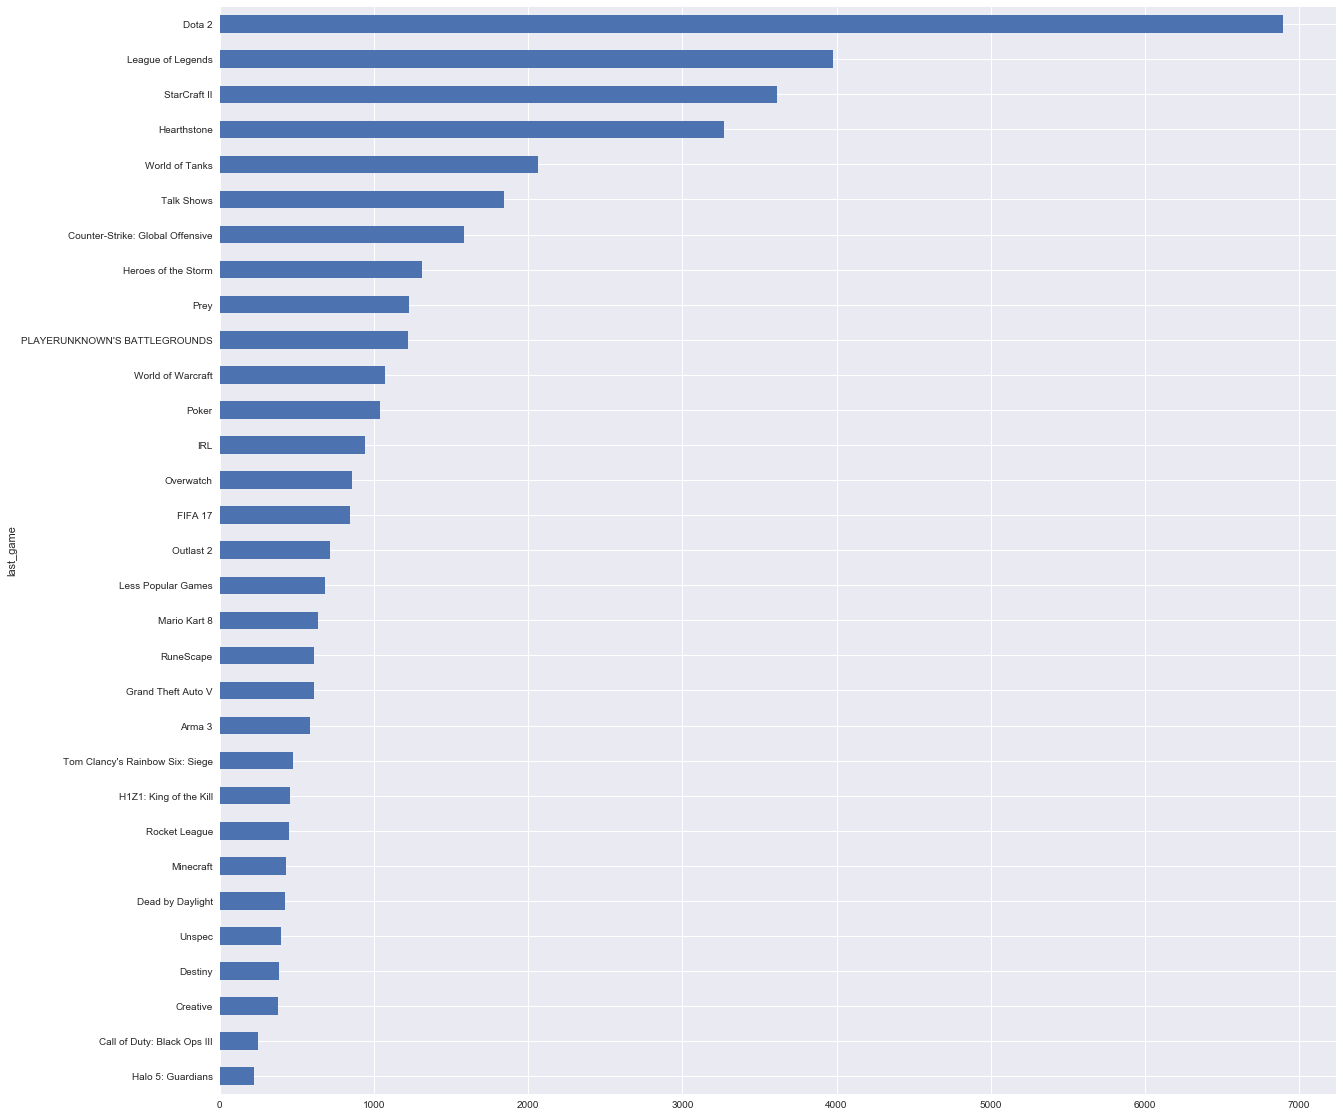

In [28]:
plt.figure(figsize=(20,20))
channelsinfo.groupby('last_game')['view_per_day'].mean().sort_values(ascending=True).plot.barh()

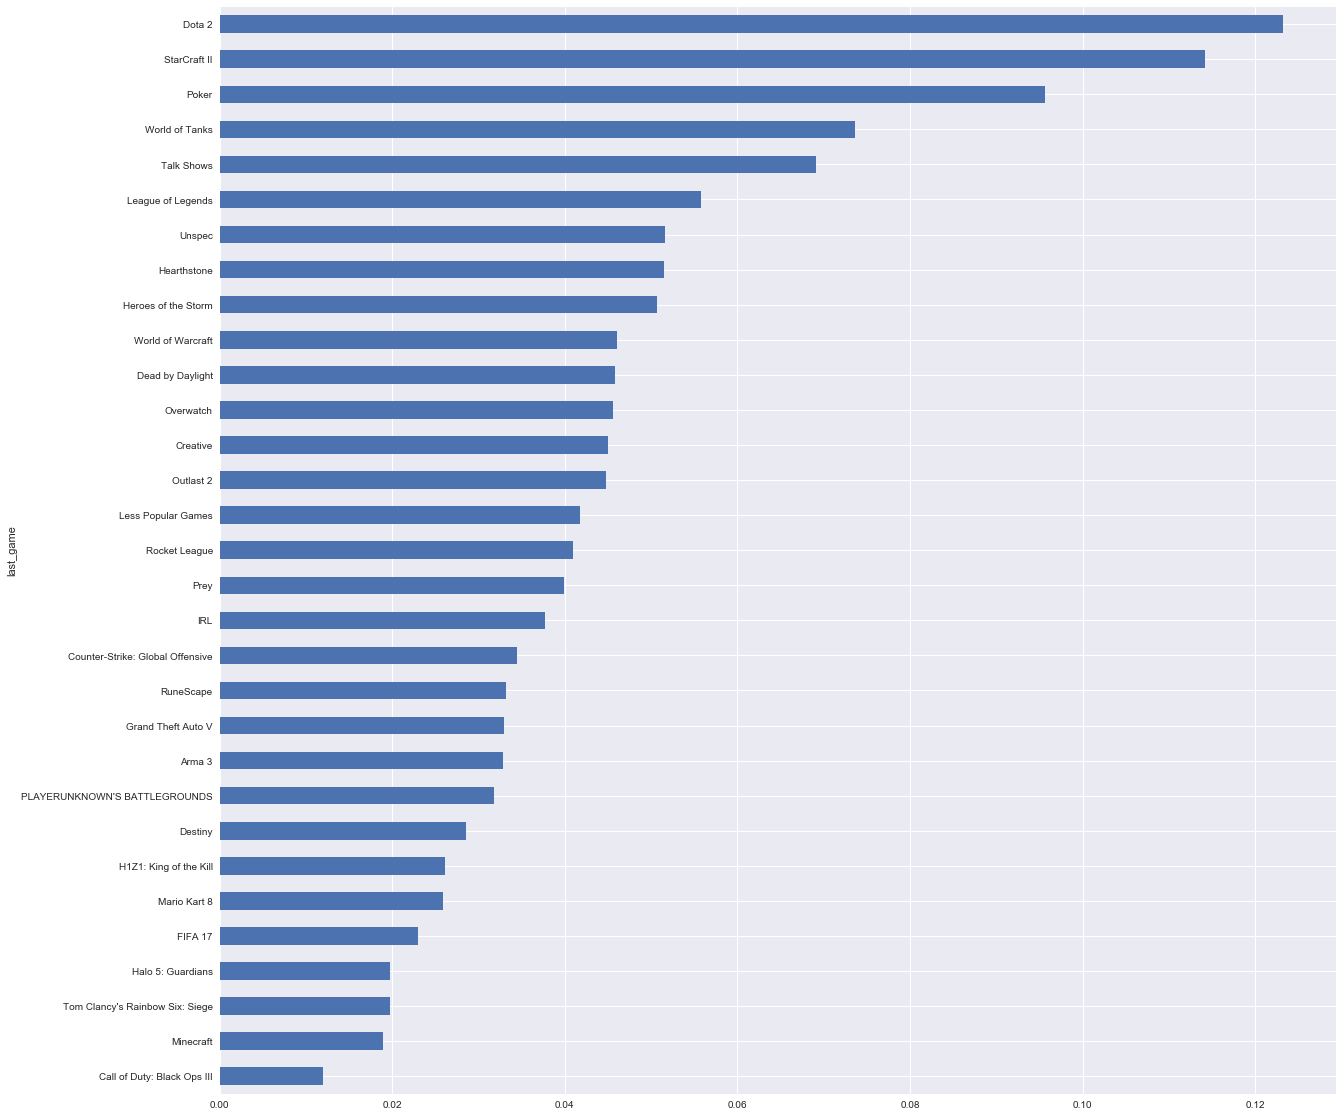

In [27]:
plt.figure(figsize=(20,20))
channelsinfo.groupby('last_game')['view_per_follower_per_day'].mean().sort_values(ascending=True).plot.barh()

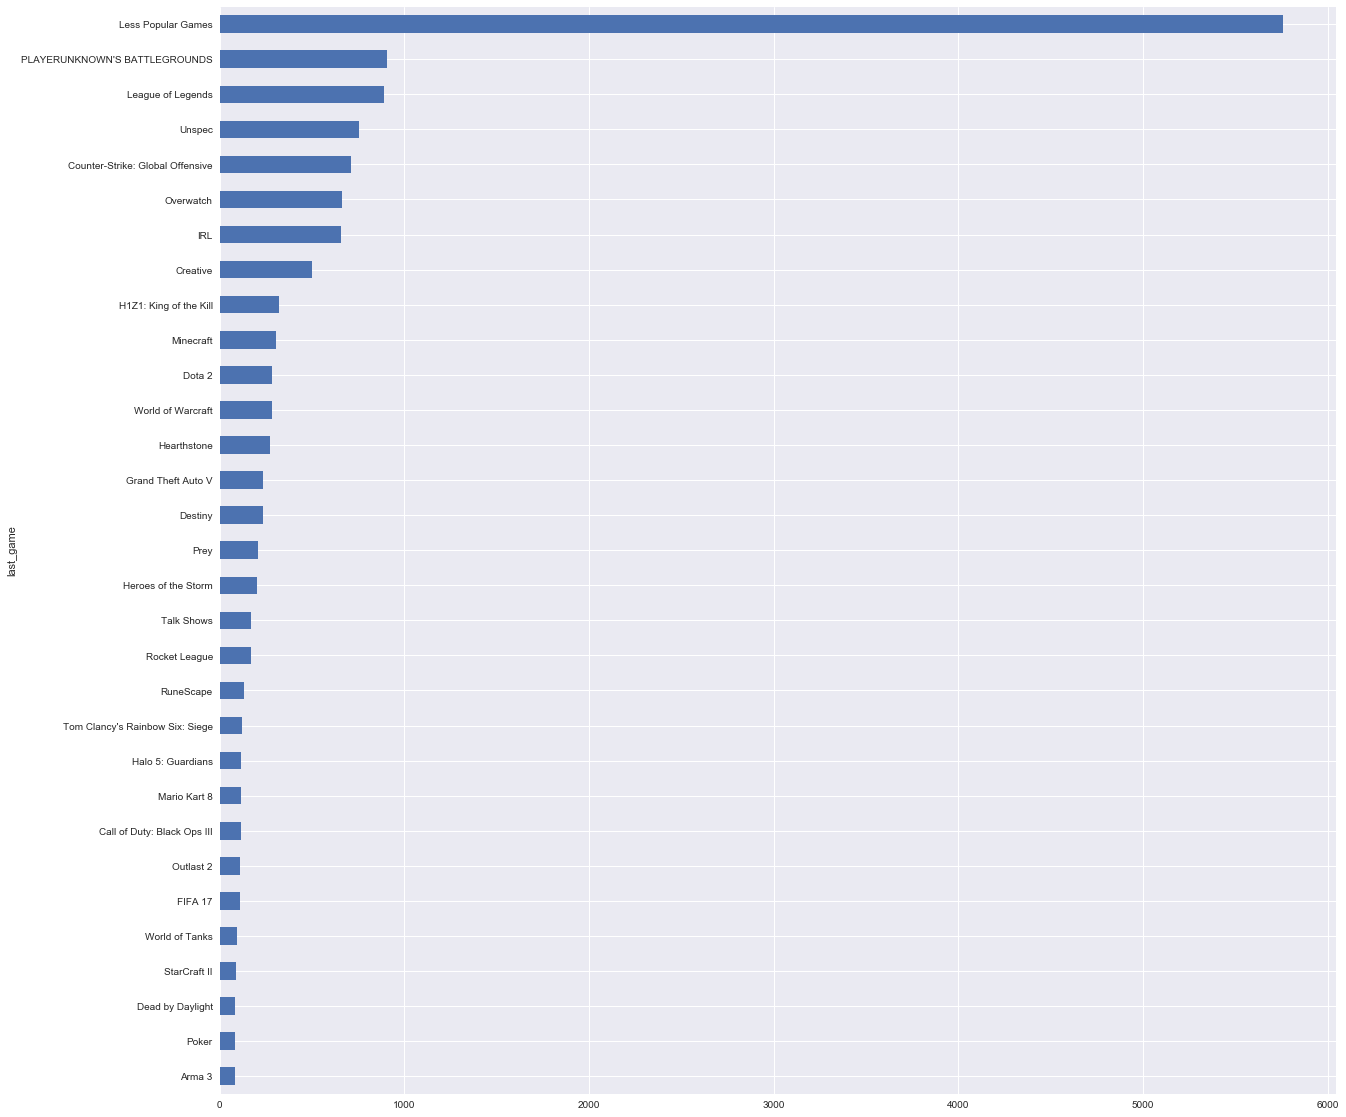

In [28]:
plt.figure(figsize=(20,20))
channelsinfo.groupby('last_game')['last_game'].count().sort_values(ascending=True).plot.barh()

(0, 0.2)

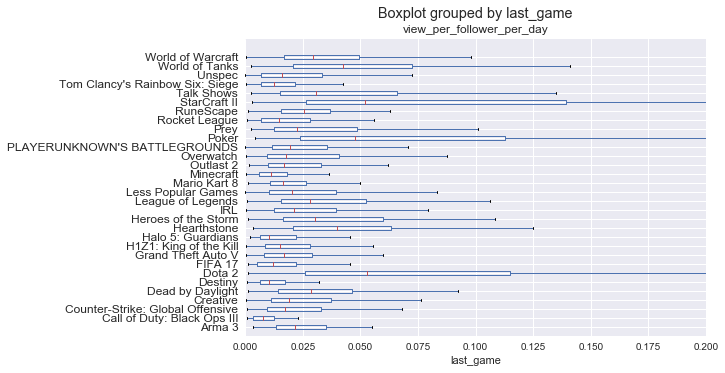

In [29]:
plt.figure(figsize=(100,500))
df_channelsinfo = channelsinfo[['last_game', 'view_per_follower_per_day']]
df_channelsinfo.boxplot(by='last_game', column='view_per_follower_per_day',vert=0)
plt.ylim((0,33))
plt.xlim((0,0.2))

(0, 0.2)

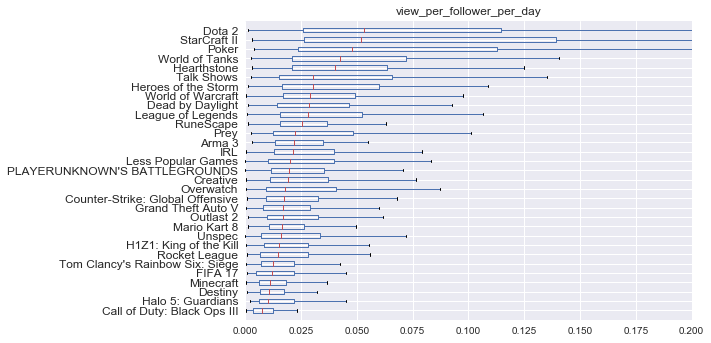

In [30]:
def boxplot_sorted(df, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes",vert=0)

df_channelsinfo = channelsinfo[['last_game', 'view_per_follower_per_day']]
axes = boxplot_sorted(df_channelsinfo, by=["last_game"], column="view_per_follower_per_day")
axes.set_title("view_per_follower_per_day")
axes.set_ylim([0,32])
axes.set_xlim([0,0.2])

(0, 4000)

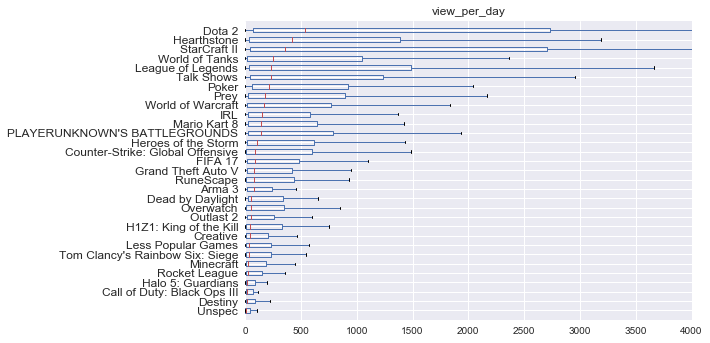

In [31]:
def boxplot_sorted(df, by, column, rot=0):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes",vert=0)

df_channelsinfo = channelsinfo[['last_game', 'view_per_day']]
axes = boxplot_sorted(df_channelsinfo, by=["last_game"], column="view_per_day")
axes.set_title("view_per_day")
axes.set_ylim([0,32])
axes.set_xlim([0,4000])

(0, 0.1)

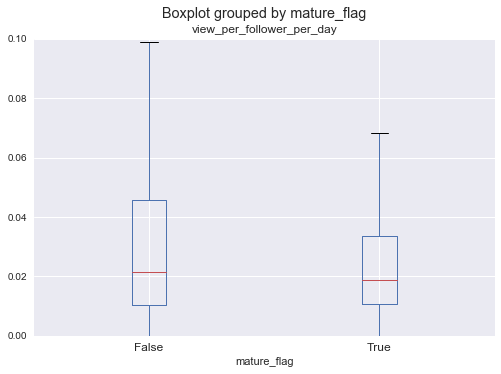

In [32]:
plt.figure(figsize=(100,500))
df_channelsinfo = channelsinfo[['mature_flag', 'view_per_follower_per_day']]
df_channelsinfo.boxplot(by='mature_flag', column='view_per_follower_per_day')
plt.ylim((0,0.1))
# plt.xlim((0,0.2))

(0, 1500)

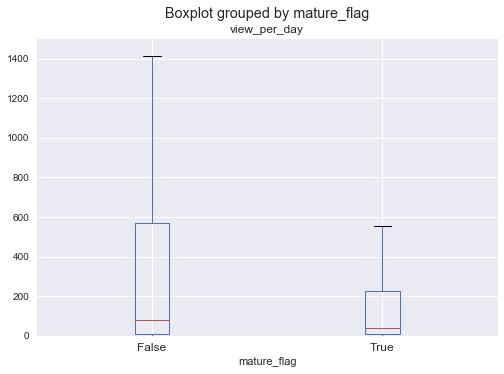

In [33]:
plt.figure(figsize=(100,500))
df_channelsinfo = channelsinfo[['mature_flag', 'view_per_day']]
df_channelsinfo.boxplot(by='mature_flag', column='view_per_day')
plt.ylim((0,1500))
# plt.xlim((0,0.2))

(0, 60)

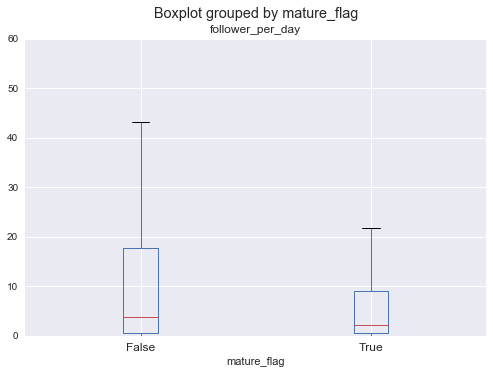

In [34]:
plt.figure(figsize=(100,500))
df_channelsinfo = channelsinfo[['mature_flag', 'follower_per_day']]
df_channelsinfo.boxplot(by='mature_flag', column='follower_per_day')
plt.ylim((0,60))
# plt.xlim((0,0.2))

(0, 60000)

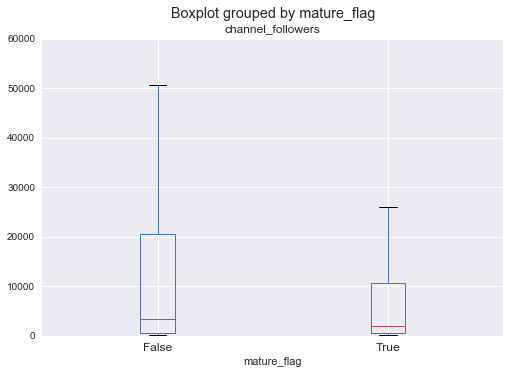

In [35]:
plt.figure(figsize=(100,500))
df_channelsinfo = channelsinfo[['mature_flag', 'channel_followers']]
df_channelsinfo.boxplot(by='mature_flag', column='channel_followers')
plt.ylim((0,60000))
# plt.xlim((0,0.2))

(0, 130000)

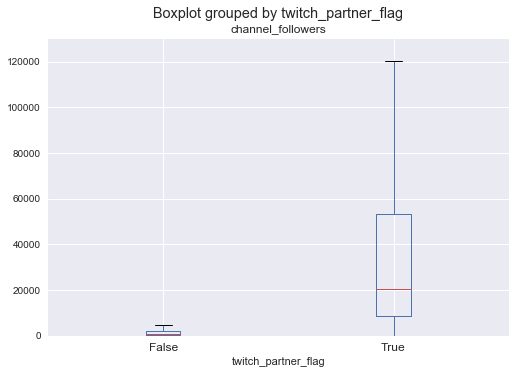

In [36]:
plt.figure(figsize=(100,500))
df_channelsinfo = channelsinfo[['twitch_partner_flag', 'channel_followers']]
df_channelsinfo.boxplot(by='twitch_partner_flag', column='channel_followers')
plt.ylim((0,130000))
# plt.xlim((0,0.2))

(0, 4000)

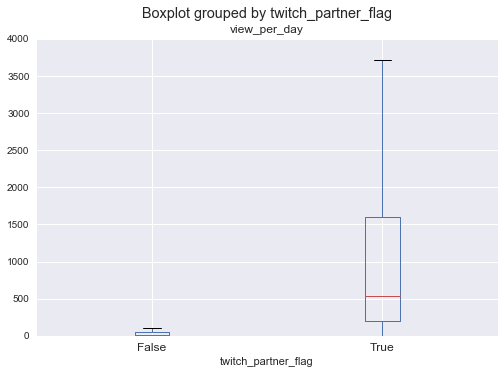

In [37]:
plt.figure(figsize=(100,500))
df_channelsinfo = channelsinfo[['twitch_partner_flag', 'view_per_day']]
df_channelsinfo.boxplot(by='twitch_partner_flag', column='view_per_day')
plt.ylim((0,4000))
# plt.xlim((0,0.2))

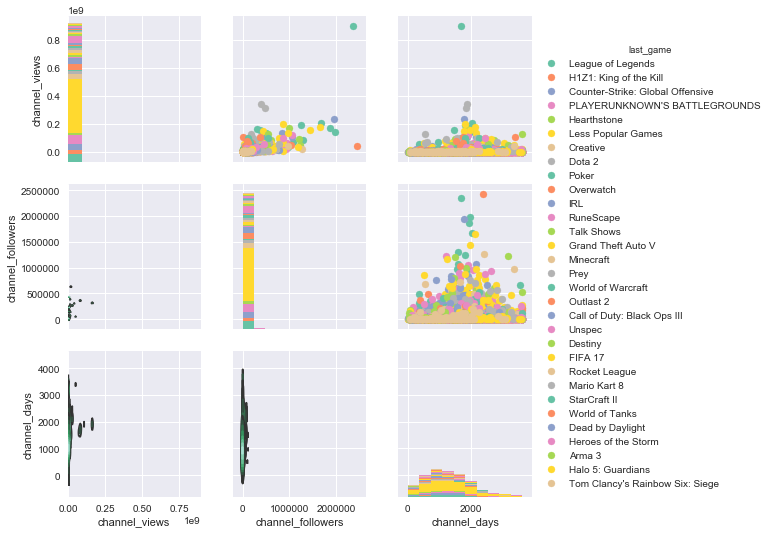

In [38]:
channelsinfo_pg = channelsinfo.loc[:,['channel_views','channel_followers','channel_days','last_game']]
g = sns.PairGrid(channelsinfo_pg, hue = 'last_game', palette='Set2')

g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()

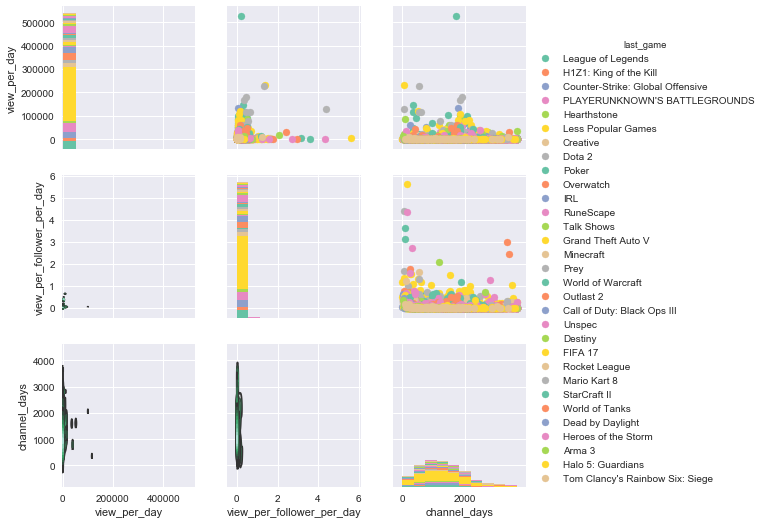

In [39]:
channelsinfo_pg = channelsinfo.loc[:,['view_per_day','view_per_follower_per_day','channel_days','last_game']]
g = sns.PairGrid(channelsinfo_pg, hue = 'last_game', palette='Set2')

g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.add_legend()

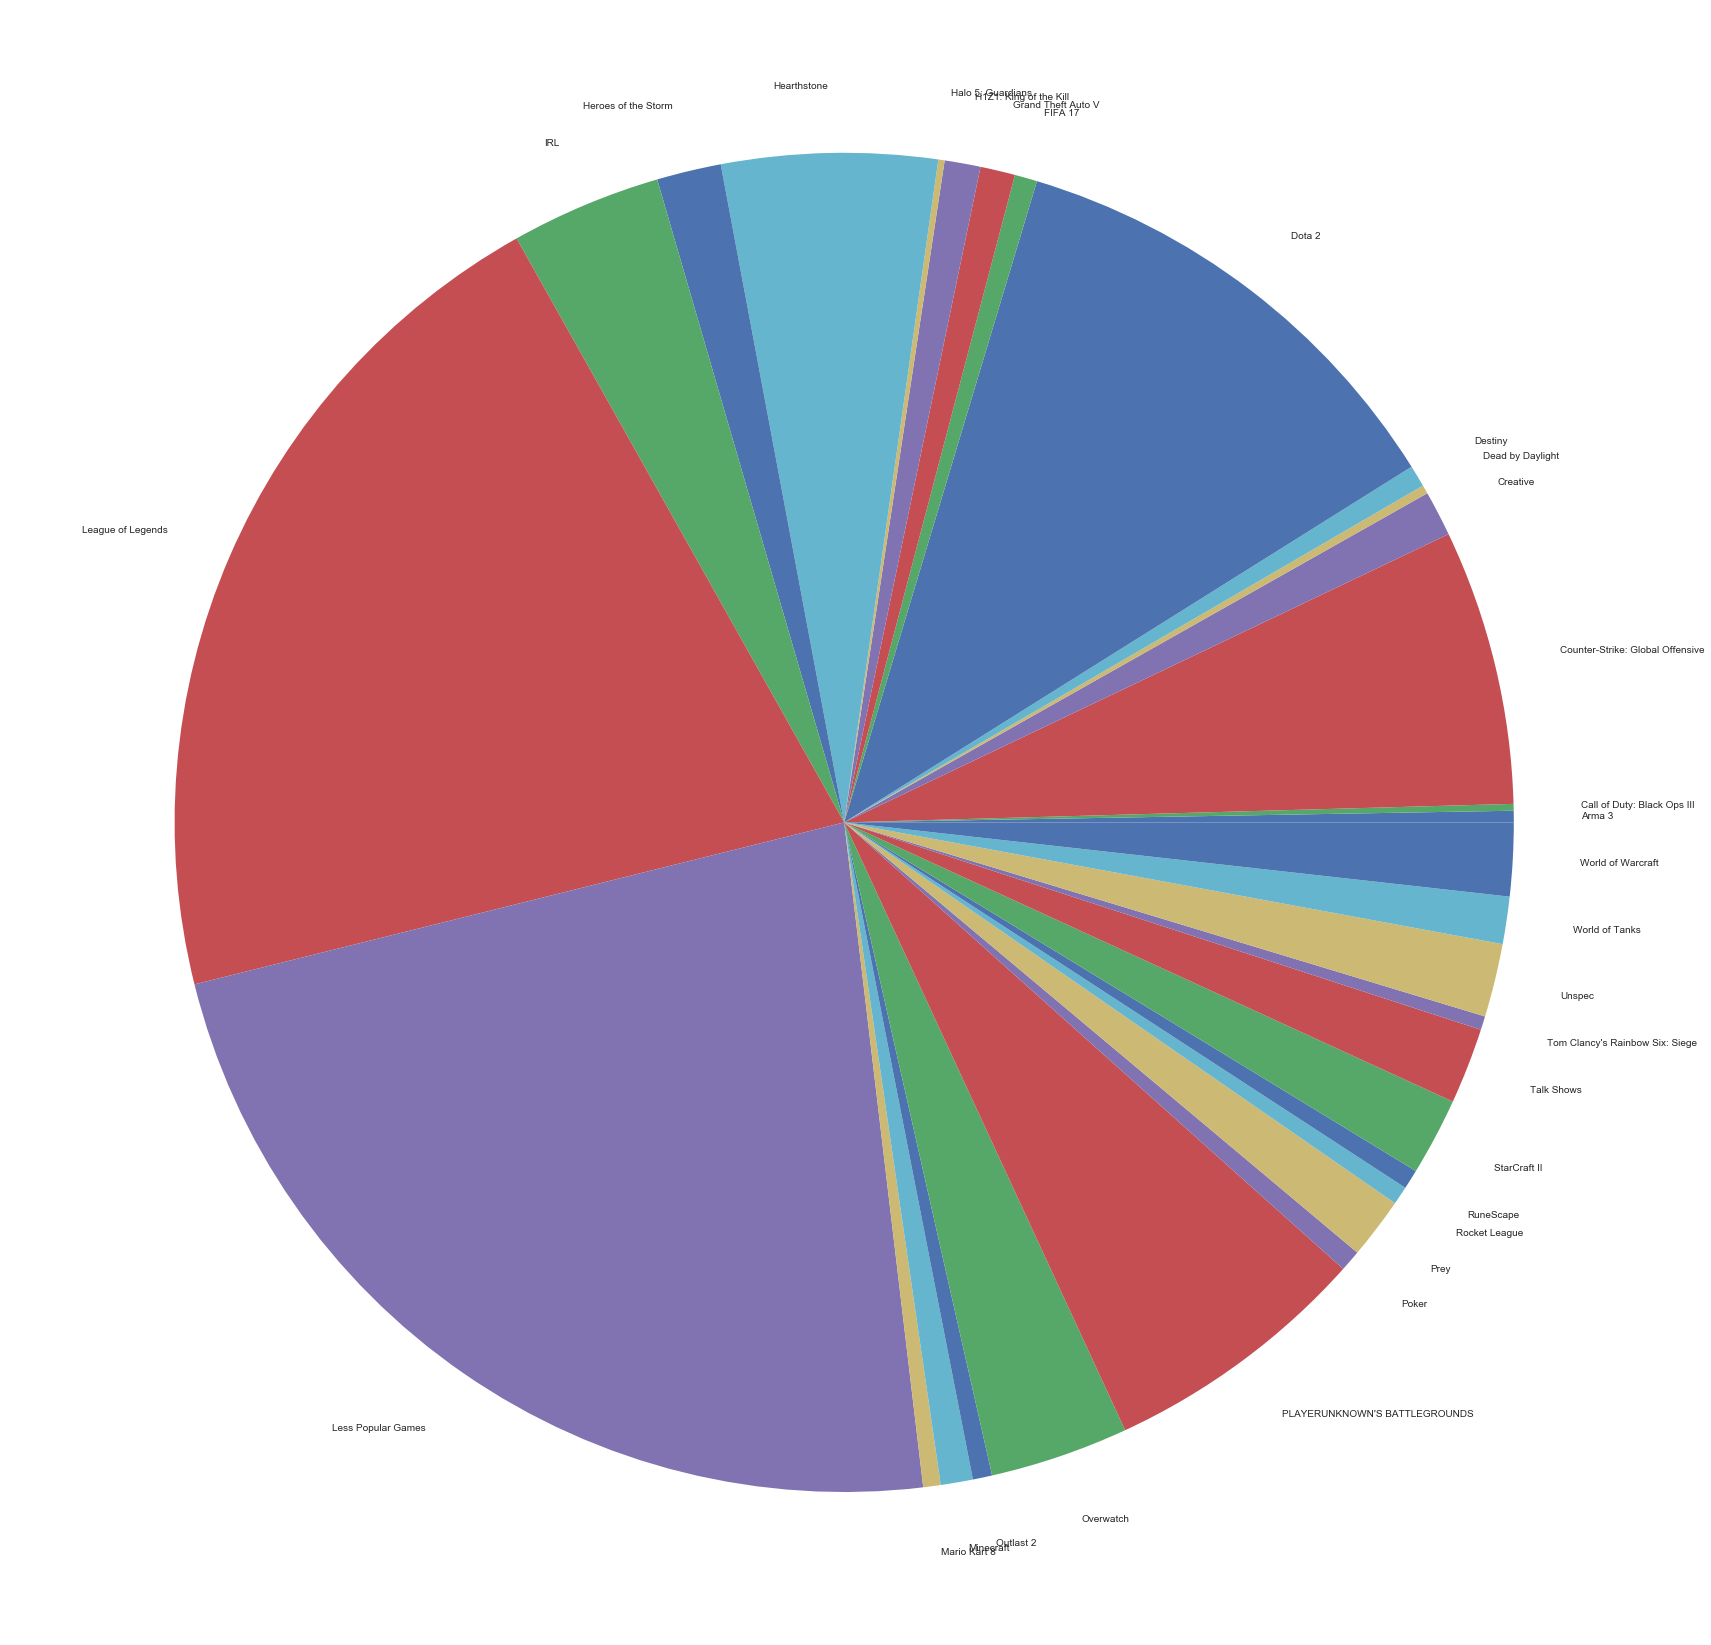

In [40]:
plt.figure(figsize=(30,30))
sums = channelsinfo.groupby('last_game')['view_per_day'].sum()
plt.axis('equal');
plt.pie(sums, labels=sums.index);
plt.show()

## Graph Nodes Edges Prep 1 -- Channel to Group  'c2g'

Eventually the channel-team interaction will be visualized with interactive graphs, so the 'node' and 'edge' data are being prepared here.

In [29]:
channelsinfo['nteams'] = map(lambda s: len(s.split(';')), channelsinfo.teams_joined)

channelsinfo.teams_joined.str.replace('did not join any team','')
channelsinfo.teams_joined = channelsinfo.teams_joined.str.replace('did not join any team','')

channelsinfo.loc[channelsinfo.teams_joined == '','nteams'] = 0 # otherwise 1 team and no team are the same

channelsinfo.loc[:,['teams_joined','nteams']].head()

,teams_joined,nteams
0,,0
1,,0
2,Polskie Strumyki;FantasyEXPO,2
3,,0
4,Tempo Storm,1


In [30]:
# a few teams have a space in front of their names
teamsinfo.team_name = teamsinfo.team_name.str.strip()

In [31]:
S = channelsinfo.teams_joined
S.head()

c2g = pd.DataFrame([],[], columns=list('cg'))
for i,s in enumerate(S):
    if s:
        gl = s.split(';')  
        n  = len(gl)
        #print gl

#         print i
#         print gi
#         print gl
        gl_i = []
        for g in gl:

            try:
                dummy = teamsinfo.team_name[teamsinfo.team_name == g].index[0]
#                 print dummy
                gl_i.append(dummy)
#                 print gl_i
            except:
#                 print gi
#                 print gl
                print ("did not find this group -- some groups are empty on their teaminfo page, yet from channelinfo you can link to them")
                print g
                pass
#             print(gl_i)
#             print 'complete %d' % i
        
        # here form the (ci, gi) pair
        # ci = i, gi = gl_i
#         print [i] * len(gl_i)
#         print gl_i
        ci = [i] * len(gl_i)
        dff = pd.DataFrame({'c':ci, 'g':gl_i})
        c2g = c2g.append(dff)

        #gi = [teamsinfo.team_name[teamsinfo.team_name == g].index[0] for g in gl]


did not find this group -- some groups are empty on their teaminfo page, yet from channelinfo you can link to them
Kona's Korner
did not find this group -- some groups are empty on their teaminfo page, yet from channelinfo you can link to them
Kona's Korner


In [32]:
c2g = c2g.reset_index(drop=True).astype(int)

c2g.head()  # this is the 'links' data frame 

,c,g
0,2,2131
1,2,2032
2,4,2126
3,5,2126
4,6,1899


In [33]:
# generating output files
c2g.to_csv('testc2g.csv')
channelsinfo.to_csv('channelsinfo_clean.csv')

In [34]:
channelsinfo.sort_values('channel_followers', ascending=False).head()

,twitch_partner_flag,page_url,display_name,account_updated_date,teams_joined,last_game,channel_followers,account_unique_id,twitch_url,channel_views,mature_flag,account_created_date,engid,channel_exist_time,channel_days,view_per_follower,view_per_day,follower_per_day,view_per_follower_per_day,nteams
14711,True,https://www.twitchtools.com/channel/syndicate,Syndicate,2017-05-07 15:03:00,,H1Z1: King of the Kill,2435468,16764225,https://www.twitch.tv/syndicate,39184733,False,2010-10-17 23:19:00,syndicate,2393 days 15:44:00,2393,16.089201,16374.731718,1017.746761,0.006723,0
14712,True,https://www.twitchtools.com/channel/riotgames,Riot Games,2017-05-07 14:05:00,League of Legends Championship S;Riot Games,League of Legends,2347538,36029255,https://www.twitch.tv/riotgames,894679309,False,2012-09-08 06:53:00,riotgames,1702 days 07:12:00,1702,381.113877,525663.518801,1379.282021,0.223921,2
14713,True,https://www.twitchtools.com/channel/summit1g,summit1g,2017-05-07 15:05:00,1G SQUAD;Corsair,League of Legends,1972178,26490481,https://www.twitch.tv/summit1g,139500883,True,2011-12-01 06:33:00,summit1g,1984 days 08:32:00,1984,70.734428,70312.945060,994.041331,0.035652,2
14714,True,https://www.twitchtools.com/channel/esl_csgo,ESL_CSGO,2017-05-07 15:06:00,ESL Gaming;CS:GO Professional Player Stream;ES...,Counter-Strike: Global Offensive,1940126,31239503,https://www.twitch.tv/esl_csgo,235151512,False,2012-06-11 13:36:00,esl_csgo,1791 days 01:30:00,1791,121.204248,131296.209939,1083.264098,0.067674,9
14715,True,https://www.twitchtools.com/channel/nightblue3,Nightblue3,2017-05-07 15:04:00,The Round Table,League of Legends,1870658,26946000,https://www.twitch.tv/nightblue3,170010485,False,2011-12-21 18:18:00,nightblue3,1963 days 20:46:00,1963,90.882719,86607.480897,952.958737,0.046298,1


## Graph Nodes Edges Prep 2 -- Team to Channel  'g2c'

Eventually the channel-team interaction will be visualized with interactive graphs, so the 'node' and 'edge' data are being prepared here.

In [35]:
print teams.dtypes
print teams.describe()
teams.head()

subfolder    object
thumbnail    object
teamname     object
nmembers     object
dtype: object
            subfolder                 thumbnail      teamname   nmembers
count            2159                      2159          2159       2159
unique           2159                      1532          2145         60
top     /team/badidea  /theme/images/avatar.png  The Madhouse  1 members
freq                1                       628             2        827


,subfolder,thumbnail,teamname,nmembers
0,/team/tmg,https://static-cdn.jtvnw.net/jtv_user_pictures...,The Melee Games,1 members
1,/team/roll20,/theme/images/avatar.png,Roll20.net,1 members
2,/team/innoutboys,https://static-cdn.jtvnw.net/jtv_user_pictures...,In n Out Boys,1 members
3,/team/gamerpowered,/theme/images/avatar.png,Gamer Powered,1 members
4,/team/noxcrew,https://static-cdn.jtvnw.net/jtv_user_pictures...,Noxcrew,1 members


In [36]:
print teamsinfo.dtypes
print teamsinfo.describe()
teamsinfo.head()

team_created_date        object
subfolder_ls            float64
team_unique_id            int64
team_updated_date        object
team_members_ls          object
nfollowers_member_ls    float64
twitch_url               object
team_name                object
page_url                 object
dtype: object
       subfolder_ls  team_unique_id  nfollowers_member_ls
count           0.0     2158.000000                   0.0
mean            NaN     2148.115385                   NaN
std             NaN     1073.851901                   NaN
min             NaN        1.000000                   NaN
25%             NaN     1282.500000                   NaN
50%             NaN     2237.500000                   NaN
75%             NaN     3062.750000                   NaN
max             NaN     4026.000000                   NaN


,team_created_date,subfolder_ls,team_unique_id,team_updated_date,team_members_ls,nfollowers_member_ls,twitch_url,team_name,page_url
0,"February 5, 2016, 18:22 GMT+0000",NaN,2676,"February 27, 2016, 17:44 GMT+0000",NaN,NaN,https://www.twitch.tv/team/tmg,The Melee Games,https://www.twitchtools.com/team/tmg
1,"June 15, 2015, 21:52 GMT+0000",NaN,2163,"June 16, 2015, 15:34 GMT+0000",misscliks,NaN,https://www.twitch.tv/team/roll20,Roll20.net,https://www.twitchtools.com/team/roll20
2,"July 27, 2016, 16:53 GMT+0000",NaN,3194,"August 17, 2016, 02:02 GMT+0000",Deuceler,NaN,https://www.twitch.tv/team/innoutboys,In n Out Boys,https://www.twitchtools.com/team/innoutboys
3,"February 29, 2016, 15:10 GMT+0000",NaN,2767,"February 29, 2016, 15:10 GMT+0000",ImJessicat,NaN,https://www.twitch.tv/team/gamerpowered,Gamer Powered,https://www.twitchtools.com/team/gamerpowered
4,"August 21, 2015, 15:08 GMT+0000",NaN,2325,"January 4, 2016, 20:20 GMT+0000",ImJessicat,NaN,https://www.twitch.tv/team/noxcrew,Noxcrew,https://www.twitchtools.com/team/noxcrew


In [37]:
teamsinfo.columns

Index([u'team_created_date', u'subfolder_ls', u'team_unique_id',
       u'team_updated_date', u'team_members_ls', u'nfollowers_member_ls',
       u'twitch_url', u'team_name', u'page_url'],
      dtype='object')

In [38]:
teamsinfo.shape

(2158, 9)

In [39]:
teamsinfo.team_members_ls[teamsinfo.team_members_ls.isnull()] = ''

teamsinfo['nchannels'] = map(lambda s: len(s.split(';')), teamsinfo.team_members_ls)

teamsinfo.team_members_ls.str.replace('did not join any team','')
teamsinfo.team_members_ls = teamsinfo.team_members_ls.str.replace('did not join any team','')

teamsinfo.loc[teamsinfo.team_members_ls == '','nchannels'] = 0 # otherwise 1 team and no team are the same

teamsinfo.loc[:,['team_members_ls','nchannels']].head()

/Users/chao/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,team_members_ls,nchannels
0,,0
1,misscliks,1
2,Deuceler,1
3,ImJessicat,1
4,ImJessicat,1


In [40]:
# change time info from str to datatime
teamsinfo.team_created_date = [s.replace(' GMT+0000','') for s in teamsinfo.team_created_date]
teamsinfo.team_updated_date = [s.replace(' GMT+0000','') for s in teamsinfo.team_updated_date]

teamsinfo.team_created_date = map(lambda s: datetime.strptime(s, '%B %d, %Y, %H:%M'), teamsinfo.team_created_date)
teamsinfo.team_updated_date = map(lambda s: datetime.strptime(s, '%B %d, %Y, %H:%M'), teamsinfo.team_updated_date)
#teamsinfo['team_exist_time'] = teamsinfo.team_updated_date - teamsinfo.team_created_date

In [41]:
teamsinfo.head()

,team_created_date,subfolder_ls,team_unique_id,team_updated_date,team_members_ls,nfollowers_member_ls,twitch_url,team_name,page_url,nchannels
0,2016-02-05 18:22:00,NaN,2676,2016-02-27 17:44:00,,NaN,https://www.twitch.tv/team/tmg,The Melee Games,https://www.twitchtools.com/team/tmg,0
1,2015-06-15 21:52:00,NaN,2163,2015-06-16 15:34:00,misscliks,NaN,https://www.twitch.tv/team/roll20,Roll20.net,https://www.twitchtools.com/team/roll20,1
2,2016-07-27 16:53:00,NaN,3194,2016-08-17 02:02:00,Deuceler,NaN,https://www.twitch.tv/team/innoutboys,In n Out Boys,https://www.twitchtools.com/team/innoutboys,1
3,2016-02-29 15:10:00,NaN,2767,2016-02-29 15:10:00,ImJessicat,NaN,https://www.twitch.tv/team/gamerpowered,Gamer Powered,https://www.twitchtools.com/team/gamerpowered,1
4,2015-08-21 15:08:00,NaN,2325,2016-01-04 20:20:00,ImJessicat,NaN,https://www.twitch.tv/team/noxcrew,Noxcrew,https://www.twitchtools.com/team/noxcrew,1


In [42]:
teamsinfo['team_view_per_day'] = 0
teamsinfo['team_followers']    = 0
teamsinfo.head()

,team_created_date,subfolder_ls,team_unique_id,team_updated_date,team_members_ls,nfollowers_member_ls,twitch_url,team_name,page_url,nchannels,team_view_per_day,team_followers
0,2016-02-05 18:22:00,NaN,2676,2016-02-27 17:44:00,,NaN,https://www.twitch.tv/team/tmg,The Melee Games,https://www.twitchtools.com/team/tmg,0,0,0
1,2015-06-15 21:52:00,NaN,2163,2015-06-16 15:34:00,misscliks,NaN,https://www.twitch.tv/team/roll20,Roll20.net,https://www.twitchtools.com/team/roll20,1,0,0
2,2016-07-27 16:53:00,NaN,3194,2016-08-17 02:02:00,Deuceler,NaN,https://www.twitch.tv/team/innoutboys,In n Out Boys,https://www.twitchtools.com/team/innoutboys,1,0,0
3,2016-02-29 15:10:00,NaN,2767,2016-02-29 15:10:00,ImJessicat,NaN,https://www.twitch.tv/team/gamerpowered,Gamer Powered,https://www.twitchtools.com/team/gamerpowered,1,0,0
4,2015-08-21 15:08:00,NaN,2325,2016-01-04 20:20:00,ImJessicat,NaN,https://www.twitch.tv/team/noxcrew,Noxcrew,https://www.twitchtools.com/team/noxcrew,1,0,0


In [56]:
S = teamsinfo.team_members_ls

g2c = pd.DataFrame([],[], columns=list('gc')) # 2 columns -- 'g' for group, and 'c' for channel

n_not_find = 0
dff = pd.DataFrame({'g':[0], 'c':[0]})

for i,s in enumerate(S):
    if s:
        cl = s.split(';')  
        n  = len(cl)
        
        cl_i              = []
        team_view_per_day = 0
        team_followers    = 0
        
        for c in cl:

            try:
                c_ind = channelsinfo.display_name[channelsinfo.display_name == c].index[0]
#                 print dummy
                cl_i.append(c_ind)
#                 print gl_i
                # this is where we generate some features for a given group using its member info
                # views_contribution_from_this_channel = channel_view_per_day / num_groups_joined
                # or generally
                # contribution = stats / num_groups_joined
                team_view_per_day += channelsinfo.view_per_day[c_ind] / channelsinfo.nteams[c_ind]
                team_followers    += channelsinfo.channel_followers[c_ind] / channelsinfo.nteams[c_ind]


            except:
#                 print gi
#                 print gl
                print ("did not find this channel -- generally because they have less than 100 followers, therefore not scraped")
                print c
                n_not_find += 1
                print n_not_find
#                 print g
                pass
#             print(gl_i)
#             print 'complete %d' % i
        
        # here form the (ci, gi) pair
        # ci = i, gi = gl_i
#         print [i] * len(gl_i)
#         print gl_i
        teamsinfo.loc[i,'team_view_per_day'] = team_view_per_day
        teamsinfo.loc[i,'team_followers']    = team_followers
        
        gi = [i] * len(cl_i)
        dff = pd.DataFrame({'g':gi, 'c':cl_i})
        print dff
        g2c = g2c.append(dff)

        #gi = [teamsinfo.team_name[teamsinfo.team_name == g].index[0] for g in gl]

       c  g
0  12287  1
      c  g
0  8548  2
      c  g
0  5793  3
      c  g
0  5793  4
      c  g
0  2811  6
      c  g
0  6609  7
       c  g
0  10030  8
       c   g
0  14004  10
      c   g
0  9916  11
       c   g
0  13759  12
      c   g
0  9905  13
       c   g
0  13170  14
       c   g
0  12809  15
      c   g
0  8502  18
      c   g
0  9196  19
       c   g
0  10759  20
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
Jf102290
1
Empty DataFrame
Columns: [c, g]
Index: []
       c   g
0  12809  22
      c   g
0  9304  23
       c   g
0  12636  24
       c   g
0  10300  25
       c   g
0  10385  26
       c   g
0  10922  28
      c   g
0  9845  29
      c   g
0  8410  30
     c   g
0  212  31
      c   g
0  3493  33
       c   g
0  13235  35
      c   g
0  7335  36
      c   g
0  9582  37
       c   g
0  11095  38
       c   g
0  11741  39
      c   g
0  4707  41
       c   g
0  10964  43
       c   g
0  12603  44
       c 

       c    g
0  12705  386
       c    g
0  10216  387
       c    g
0  12214  388
       c    g
0  14089  389
      c    g
0  5596  390
      c    g
0  7325  393
       c    g
0  11205  394
       c    g
0  12754  395
       c    g
0  12845  396
       c    g
0  11472  397
       c    g
0  10684  398
       c    g
0  10266  399
     c    g
0  237  401
      c    g
0  6810  403
       c    g
0  11979  404
       c    g
0  12616  405
       c    g
0  13134  406
       c    g
0  13134  407
      c    g
0  9736  408
       c    g
0  14489  409
      c    g
0  9759  411
       c    g
0  11727  412
       c    g
0  14042  413
     c    g
0  433  415
       c    g
0  13815  416
       c    g
0  10243  417
       c    g
0  11181  418
       c    g
0  13007  419
       c    g
0  12414  420
       c    g
0  12554  421
      c    g
0  9025  422
       c    g
0  12177  423
       c    g
0  14326  425
       c    g
0  14326  426
       c    g
0  12294  427
       c    g
0  10872  428
       c    

0  9656  695
       c    g
0  13472  696
     c    g
0  414  697
      c    g
0  7681  698
       c    g
0  10774  699
      c    g
0  5289  700
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
jude_lux
15
Empty DataFrame
Columns: [c, g]
Index: []
      c    g
0  8680  702
      c    g
0  8430  703
      c    g
0  9554  704
      c    g
0  4955  705
      c    g
0  7450  706
       c    g
0  12538  707
       c    g
0  11267  708
       c    g
0  10152  709
       c    g
0  11978  710
       c    g
0  13544  711
       c    g
0  13921  712
       c    g
0  10791  713
     c    g
0  436  714
      c    g
0  9595  715
       c    g
0  12472  717
       c    g
0  12498  718
      c    g
0  8271  720
       c    g
0  12105  721
      c    g
0  8795  722
      c    g
0  9733  723
       c    g
0  13911  724
      c    g
0  9135  725
      c    g
0  8940  726
      c    g
0  8378  727
       c    g
0  13452  728
       c    g
0  10765  7

       c    g
0  10302  970
1  10510  970
       c    g
0  13474  971
1  10040  971
      c    g
0  8839  972
1  9034  972
       c    g
0  11556  973
       c    g
0  11790  974
1  10144  974
       c    g
0  14414  975
1  11931  975
       c    g
0  14038  976
1   7997  976
       c    g
0  14381  977
1  14283  977
       c    g
0   6413  978
1  11265  978
       c    g
0  11817  979
1   9483  979
       c    g
0  10037  980
      c    g
0  5518  981
1  9321  981
       c    g
0  10258  982
1  12537  982
       c    g
0  12201  983
1   9985  983
      c    g
0  2215  984
1  7609  984
      c    g
0  3485  985
1  7856  985
       c    g
0  14520  986
1  13256  986
       c    g
0  11300  987
1  12503  987
       c    g
0  11185  988
      c    g
0  4737  989
      c    g
0  6042  990
       c    g
0  11897  992
1  12243  992
       c    g
0  11247  993
1   9950  993
       c    g
0  11803  994
1  12503  994
       c    g
0  10631  995
1  13027  995
       c    g
0    209  996
1  12944

       c     g
0  12459  1178
1    175  1178
2  11747  1178
       c     g
0  13366  1179
1  11319  1179
2   7188  1179
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
ThoughtsofGlought
28
       c     g
0  11185  1180
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
Dayzjus
29
      c     g
0  1990  1181
1  6331  1181
       c     g
0  10574  1182
1  10830  1182
2  13041  1182
       c     g
0   6375  1183
1   3666  1183
2  10440  1183
       c     g
0  10259  1184
1   8125  1184
2  11751  1184
       c     g
0   9402  1185
1  12861  1185
2  12627  1185
       c     g
0   9066  1186
1   9049  1186
2  11264  1186
       c     g
0  10982  1187
1  12909  1187
2  13640  1187
      c     g
0  3401  1188
1  6115  1188
2  1570  1188
       c     g
0  10167  1189
1  10711  1189
2   8172  1189
      c     g
0  9268  1190
1  9005  1190
2  5486  1190
       c     g
0   8594  1191
1  111

       c     g
0  10643  1308
1  12845  1308
2   7112  1308
       c     g
0  13037  1309
1   7579  1309
2   6455  1309
       c     g
0  10505  1310
1   8725  1310
2  11035  1310
       c     g
0  13043  1311
1  11423  1311
       c     g
0  11976  1312
1   9452  1312
2   6892  1312
      c     g
0    37  1313
1  8272  1313
2  7577  1313
       c     g
0  11973  1314
1   8316  1314
       c     g
0   9113  1316
1   8013  1316
2  12758  1316
       c     g
0    155  1317
1  13885  1317
2  14546  1317
       c     g
0  10968  1318
1  10614  1318
2   7680  1318
       c     g
0  10206  1319
1  13619  1319
2   9170  1319
       c     g
0  13763  1320
1  13636  1320
2  13805  1320
       c     g
0  12444  1321
1  11557  1321
2  13693  1321
       c     g
0    379  1322
1  11045  1322
2  11540  1322
       c     g
0  11898  1323
1  13551  1323
2  10780  1323
      c     g
0  8465  1324
1  6117  1324
2  3738  1324
       c     g
0  11296  1325
       c     g
0  14326  1326
1  10917  1326
2  

       c     g
0  10699  1435
1   6923  1435
2   9244  1435
3   3963  1435
       c     g
0  10800  1436
1  10466  1436
2  11013  1436
3  10962  1436
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
Blankyh
42
      c     g
0   390  1437
1  2628  1437
2  3652  1437
       c     g
0  11147  1438
1   9396  1438
2   9002  1438
3   8360  1438
      c     g
0  7182  1439
1  8961  1439
2  5696  1439
       c     g
0  10651  1440
1    160  1440
2  12757  1440
3   8671  1440
       c     g
0  11413  1441
1  12319  1441
2   5321  1441
3  12260  1441
       c     g
0  11552  1442
1   8292  1442
2   7324  1442
3   8185  1442
       c     g
0  14616  1443
1  13364  1443
2    116  1443
3  13290  1443
       c     g
0  14642  1444
1  14179  1444
2  10536  1444
3     50  1444
       c     g
0  10743  1445
1  10174  1445
2   3879  1445
3  10215  1445
       c     g
0   9599  1446
1   8632  1446
2  10461  1446
3  13736  1446
       c     g
0  14325

       c     g
0   9435  1546
1  10386  1546
2   7684  1546
3   3640  1546
       c     g
0  11265  1547
       c     g
0  14325  1548
1  14366  1548
2  12294  1548
3  11580  1548
       c     g
0  11497  1549
1  12167  1549
2   9446  1549
3  10279  1549
       c     g
0  12047  1550
1  14281  1550
2    302  1550
3  10030  1550
       c     g
0    394  1551
1  12998  1551
2     31  1551
3    189  1551
       c     g
0  14250  1552
1     20  1552
2  11909  1552
3   9611  1552
      c     g
0  9690  1553
1  8934  1553
2  2034  1553
3  1131  1553
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
RibShark
45
       c     g
0  13686  1554
1   4603  1554
2   6138  1554
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
faltion
46
       c     g
0    124  1555
1  10735  1555
2   8222  1555
       c     g
0  13489  1556
1  11151  1556
2     26  1556
3  10755  1556
       c     g
0  12380 

       c     g
0   9629  1651
1   9744  1651
2   7361  1651
3  10820  1651
4   7389  1651
5   4084  1651
       c     g
0   9937  1652
1  10961  1652
2   8898  1652
3  10026  1652
4   5314  1652
5   4772  1652
       c     g
0  11832  1653
1   4331  1653
2  10805  1653
3  10836  1653
4  11056  1653
5   7730  1653
       c     g
0   9885  1654
1   7839  1654
2  11088  1654
3   7224  1654
4   8236  1654
5   9103  1654
       c     g
0   7508  1655
1   8115  1655
2  10423  1655
3   7951  1655
4   7667  1655
5   6540  1655
       c     g
0  11815  1656
1  13387  1656
2   7835  1656
3  11015  1656
4   8960  1656
       c     g
0  14073  1657
1  13293  1657
2  13396  1657
3  12861  1657
4  12064  1657
5  13322  1657
       c     g
0  12686  1658
1   8779  1658
2   6720  1658
3   5881  1658
4   8658  1658
5   6389  1658
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
llpunisherll
48
did not find this channel -- generally because they hav

       c     g
0  13667  1736
1    187  1736
2  11683  1736
3  12379  1736
4  10726  1736
5  12464  1736
       c     g
0  13909  1737
1     39  1737
2    311  1737
3  12497  1737
4  12131  1737
5  10595  1737
       c     g
0  12759  1738
1  12305  1738
2   9094  1738
3  13741  1738
4   9703  1738
5  12283  1738
6  10018  1738
       c     g
0  12459  1739
1    175  1739
2   9991  1739
3   5492  1739
4  10430  1739
5   7678  1739
6   8765  1739
       c     g
0  10068  1740
1   5085  1740
2   4206  1740
3   7876  1740
4   7442  1740
5   8491  1740
6   8479  1740
       c     g
0  12885  1741
1  13328  1741
2   8391  1741
3   7637  1741
4   8857  1741
5  10205  1741
6   8311  1741
       c     g
0  10657  1742
1   8662  1742
2  10892  1742
3   5790  1742
4   7335  1742
5   8244  1742
6   7544  1742
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
stray_dog_gaming
56
       c     g
0  11803  1743
1   5481  1743
2   3532  1743
3   84

       c     g
0  11599  1808
1  12829  1808
2   7708  1808
3  11499  1808
4   5254  1808
5   6756  1808
6   2457  1808
7   8978  1808
       c     g
0  12825  1809
1  13256  1809
2  10873  1809
3   4605  1809
4  12224  1809
5   3736  1809
6  12241  1809
       c     g
0  10656  1810
1   8429  1810
2   8738  1810
3   8038  1810
4   7672  1810
5   9480  1810
6   8610  1810
7   2086  1810
       c     g
0   8193  1811
1  13897  1811
2    480  1811
3  11604  1811
4  11664  1811
5  11319  1811
6   4653  1811
       c     g
0  12671  1812
1  12934  1812
2  11696  1812
3  10391  1812
4  10573  1812
5  11977  1812
6   8601  1812
7  10132  1812
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
MeleeItOnMe
63
       c     g
0  11444  1813
1  14529  1813
2     72  1813
3  10329  1813
4  12367  1813
5  12809  1813
       c     g
0  13676  1814
1  11367  1814
2  13814  1814
3    315  1814
4  11973  1814
5  10978  1814
6  11393  1814
       c   

8  11983  1872
       c     g
0  12327  1873
1  14613  1873
2  10706  1873
3  13967  1873
4   9470  1873
5  14585  1873
6    463  1873
7  12922  1873
8   9426  1873
       c     g
0  11696  1874
1  10913  1874
2   4353  1874
3   3350  1874
4  11796  1874
5  11977  1874
6   8601  1874
7   7235  1874
8   9798  1874
       c     g
0    384  1875
1  10271  1875
2   9870  1875
3   7781  1875
4  12466  1875
5  11615  1875
6   2322  1875
7   6418  1875
8   6160  1875
       c     g
0  12808  1876
1  13014  1876
2   5203  1876
3    336  1876
4   8759  1876
5   8857  1876
6  11253  1876
7  13629  1876
8  12044  1876
       c     g
0  10656  1877
1   8716  1877
2   9764  1877
3   8738  1877
4   4946  1877
5   9513  1877
6   6772  1877
7   7826  1877
8   7976  1877
       c     g
0  11759  1878
1   9764  1878
2  10746  1878
3   3027  1878
4   7708  1878
5   8738  1878
6   8351  1878
7   7826  1878
8   7289  1878
       c     g
0  10760  1879
1  11961  1879
2  13257  1879
3   9764  1879
4  10913  

9  12735  1927
       c     g
0  13220  1928
1  14358  1928
2  13353  1928
3  11815  1928
4    213  1928
5  12486  1928
6  12870  1928
7  13387  1928
8  11798  1928
9   8162  1928
       c     g
0  14580  1929
1  11618  1929
2  13532  1929
3  12750  1929
4  11950  1929
5   7537  1929
6  12113  1929
7  10353  1929
8  13062  1929
9  10360  1929
       c     g
0  14369  1930
1  13984  1930
2    416  1930
3  13434  1930
4  12998  1930
5  10398  1930
6  14178  1930
7  13401  1930
8  11567  1930
9  12224  1930
       c     g
0  12575  1931
1    416  1931
2  11439  1931
3  11474  1931
4     93  1931
5  12425  1931
6  11594  1931
7  11496  1931
8  11546  1931
       c     g
0  14202  1932
1  12574  1932
2  13298  1932
3  12976  1932
4  10184  1932
5  10479  1932
6   9989  1932
7  10031  1932
8   9284  1932
9  11015  1932
       c     g
0  14583  1933
1  14577  1933
2  10429  1933
3   8763  1933
4   3015  1933
5   1713  1933
6   7133  1933
7  12869  1933
8   9661  1933
9  13576  1933
       c  

        c     g
0    9106  1979
1   14682  1979
2     403  1979
3   13815  1979
4   14584  1979
5   12258  1979
6   14664  1979
7   11998  1979
8   11537  1979
9   11196  1979
10  14685  1979
11  10422  1979
12   8273  1979
        c     g
0   13085  1980
1   11508  1980
2    8201  1980
3   10148  1980
4    7712  1980
5    7931  1980
6    9239  1980
7    9785  1980
8    7401  1980
9    7961  1980
10   7301  1980
11  10225  1980
12   9055  1980
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
Jewwseph_
73
        c     g
0   14591  1981
1   12250  1981
2     420  1981
3    8122  1981
4    9557  1981
5   10261  1981
6    5181  1981
7    5991  1981
8    3514  1981
9   12579  1981
10   5289  1981
11  10829  1981
        c     g
0   10425  1982
1   13570  1982
2     123  1982
3   12870  1982
4   11901  1982
5   12563  1982
6   11732  1982
7   11496  1982
8   12351  1982
9   10510  1982
10   9762  1982
11   8367  1982
12  11135  1982
   

14  10225  2014
        c     g
0   13753  2015
1   12853  2015
2   13936  2015
3   11364  2015
4   12680  2015
5   11644  2015
6   11789  2015
7   12478  2015
8    8958  2015
9   13617  2015
10  13674  2015
11   8535  2015
12  11161  2015
13   9203  2015
14  11779  2015
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
walter_666
77
        c     g
0   11108  2016
1   13208  2016
2     126  2016
3   11147  2016
4   12077  2016
5    6234  2016
6    9019  2016
7    8492  2016
8    8342  2016
9    9002  2016
10   5981  2016
11   6535  2016
12   8657  2016
        c     g
0   11497  2017
1   10024  2017
2    9759  2017
3   12987  2017
4    8170  2017
5   10631  2017
6    7339  2017
7    2630  2017
8   11821  2017
9    5390  2017
10  11088  2017
11   5873  2017
12   7080  2017
13   7263  2017
        c     g
0     429  2018
1   13172  2018
2   11181  2018
3    8934  2018
4   12551  2018
5    8704  2018
6   13604  2018
7   11636  2018
8 

did not find this channel -- generally because they have less than 100 followers, therefore not scraped
Lerbatov
82
        c     g
0   10610  2053
1    9600  2053
2    6844  2053
3    4390  2053
4    2112  2053
5    3876  2053
6    4336  2053
7    4860  2053
8    1825  2053
9    7630  2053
10   5048  2053
11   3811  2053
12   1265  2053
13   8116  2053
14   5082  2053
15   2984  2053
        c     g
0   13969  2054
1   12047  2054
2   14156  2054
3   14388  2054
4   13999  2054
5   14264  2054
6   14525  2054
7   14371  2054
8     185  2054
9     158  2054
10  14240  2054
11  13204  2054
12  14463  2054
13  11377  2054
14   5853  2054
15  11105  2054
16  11135  2054
        c     g
0   14697  2055
1   14717  2055
2   13595  2055
3   14174  2055
4   14313  2055
5   14525  2055
6     158  2055
7   12420  2055
8   13471  2055
9   11332  2055
10   2832  2055
11   8317  2055
12   4878  2055
13   5458  2055
14   9610  2055
15   8681  2055
        c     g
0   14576  2056
1   14604  2056
2   

did not find this channel -- generally because they have less than 100 followers, therefore not scraped
proch1ller
89
       c     g
0   6851  2077
1   7470  2077
2   7732  2077
3   3366  2077
4   7969  2077
5   4866  2077
6   1919  2077
7   2728  2077
8   2736  2077
9   7402  2077
10  7286  2077
11  1034  2077
12  1246  2077
13  1097  2077
14  2473  2077
15  6332  2077
16  5728  2077
17  2966  2077
        c     g
0   14377  2078
1   10879  2078
2   12602  2078
3     215  2078
4      94  2078
5   12571  2078
6   13224  2078
7   10109  2078
8       9  2078
9   12398  2078
10    149  2078
11  13617  2078
12  11723  2078
13  10871  2078
14  12031  2078
15  12933  2078
16   7762  2078
17  13640  2078
18   5679  2078
19  13214  2078
20    109  2078
        c     g
0   14667  2079
1   14551  2079
2   13440  2079
3     114  2079
4   14333  2079
5     214  2079
6   14646  2079
7   14285  2079
8     260  2079
9   14346  2079
10    407  2079
11    249  2079
12  11490  2079
13  11899  2079
14  1

        c     g
0   14536  2100
1   14718  2100
2    9690  2100
3   12380  2100
4   12047  2100
5     383  2100
6   14368  2100
7   14591  2100
8   13206  2100
9     226  2100
10  14301  2100
11  11687  2100
12  13233  2100
13  14658  2100
14  12756  2100
15  13001  2100
16  14238  2100
17  11788  2100
18     97  2100
19  11538  2100
20  13173  2100
21  14569  2100
22  13942  2100
23    420  2100
24    181  2100
25  13975  2100
26  14414  2100
27  11529  2100
28  11986  2100
29  14397  2100
30  11734  2100
31  11770  2100
32  11945  2100
33  12538  2100
34  13510  2100
35   4991  2100
36    201  2100
        c     g
0    9106  2101
1   10269  2101
2   14521  2101
3   13861  2101
4   14212  2101
5   13555  2101
6   14668  2101
7   11571  2101
8   13591  2101
9   14231  2101
10  13077  2101
11   8804  2101
12   9171  2101
13    227  2101
14  10960  2101
15  14077  2101
16  10635  2101
17  13784  2101
18  13799  2101
19   9914  2101
20  14276  2101
21   4492  2101
22  10436  2101
23   923

        c     g
0   11599  2116
1   12671  2116
2   12310  2116
3     326  2116
4   14051  2116
5   10699  2116
6   13999  2116
7   13792  2116
8    9708  2116
9   10729  2116
10  11300  2116
11   8312  2116
12    254  2116
13    123  2116
14  13007  2116
15    185  2116
16  13089  2116
17  13752  2116
18  13367  2116
19    450  2116
20  12582  2116
21  12608  2116
22  10913  2116
23  13363  2116
24  11724  2116
25  11977  2116
26  11408  2116
27  11808  2116
        c     g
0    9690  2117
1   10614  2117
2    9474  2117
3   11647  2117
4      20  2117
5   10861  2117
6    8443  2117
7    5765  2117
8   10525  2117
9    6837  2117
10   5809  2117
11   9048  2117
12   9497  2117
13   8687  2117
14   3448  2117
15   4598  2117
16   5456  2117
17   9226  2117
18   4394  2117
19   8104  2117
20   5427  2117
21   4767  2117
22   6151  2117
23   7967  2117
24   6304  2117
25   6482  2117
26   2957  2117
27   6028  2117
did not find this channel -- generally because they have less than 100 f

did not find this channel -- generally because they have less than 100 followers, therefore not scraped
marcinpudlo
112
        c     g
0    9151  2131
1   14396  2131
2   11738  2131
3   14073  2131
4     422  2131
5   10890  2131
6   11487  2131
7   13293  2131
8   14018  2131
9   10134  2131
10  10232  2131
11  10307  2131
12  12892  2131
13   6279  2131
14   8699  2131
15  10920  2131
16  12772  2131
17  13806  2131
18    211  2131
19  13396  2131
20  13607  2131
21  13744  2131
22      2  2131
23  12505  2131
24  13724  2131
25  10235  2131
26  13645  2131
27  12357  2131
28  13261  2131
29   5205  2131
..    ...   ...
63   7978  2131
64   7275  2131
65   4932  2131
66   1254  2131
67  12016  2131
68  10628  2131
69   4513  2131
70   3814  2131
71  12314  2131
72   7759  2131
73  12064  2131
74  14685  2131
75   3095  2131
76   8665  2131
77  10427  2131
78  10692  2131
79  10731  2131
80    373  2131
81   7031  2131
82   8894  2131
83  12661  2131
84   7898  2131
85  10245  2131


        c     g
0     330  2141
1   11323  2141
2   14071  2141
3   10880  2141
4   13996  2141
5   14326  2141
6   14714  2141
7   13763  2141
8   14669  2141
9   14221  2141
10   4107  2141
11   3043  2141
12  14093  2141
13   9926  2141
14  13100  2141
15    134  2141
16  13728  2141
17  13815  2141
18   2207  2141
19    199  2141
20  13965  2141
21  12291  2141
22  13228  2141
23  13697  2141
24  14549  2141
25  11378  2141
26   7015  2141
27  10173  2141
28  11489  2141
29  11998  2141
30  13324  2141
31  12412  2141
32  13582  2141
33  13960  2141
34  14554  2141
35  10917  2141
36   8482  2141
37  13937  2141
38  13713  2141
39    347  2141
40   9181  2141
41   8730  2141
42  14540  2141
43   4971  2141
44  12246  2141
45  12238  2141
46  14455  2141
47  11668  2141
48  12446  2141
49  14004  2141
50  11615  2141
51  14550  2141
52  13297  2141
53   7273  2141
54  14216  2141
55  13873  2141
56   7277  2141
did not find this channel -- generally because they have less than 100 f

did not find this channel -- generally because they have less than 100 followers, therefore not scraped
lagwka
127
did not find this channel -- generally because they have less than 100 followers, therefore not scraped
FireStarW
128
        c     g
0    9435  2153
1   13489  2153
2   13691  2153
3   13303  2153
4   12863  2153
5   12166  2153
6   11552  2153
7   10011  2153
8    8150  2153
9   10386  2153
10  12488  2153
11  10960  2153
12   9872  2153
13   8292  2153
14   6451  2153
15  13784  2153
16   9914  2153
17  14106  2153
18   7105  2153
19   3294  2153
20   7912  2153
21   2967  2153
22  10464  2153
23   6984  2153
24   6547  2153
25   7684  2153
26   9196  2153
27   2212  2153
28  11828  2153
29   9675  2153
30  10412  2153
31  10313  2153
32   6815  2153
33   3640  2153
34   9285  2153
35   1518  2153
36   3672  2153
37   6087  2153
38   3704  2153
39   2031  2153
40   5691  2153
        c     g
0   14700  2154
1   14538  2154
2     103  2154
3   14576  2154
4     400  2154

In [57]:
g2c.head()

,c,g
0,12287.0,1.0
0,8548.0,2.0
0,5793.0,3.0
0,5793.0,4.0
0,2811.0,6.0


In [47]:
g2c = pd.DataFrame([],[], columns=list('gc'))
g2c

,g,c


In [40]:
teamsinfo.sort_values('team_view_per_day',ascending=False)

,team_created_date,subfolder_ls,team_unique_id,team_updated_date,team_members_ls,nfollowers_member_ls,twitch_url,team_name,page_url,nchannels,team_view_per_day,team_followers
2090,2012-04-28 23:02:00,NaN,272,2016-01-12 06:58:00,nl_Kripp;TSM_Dyrus;TSM_TheOddOne;Wingsofdeath;...,NaN,https://www.twitch.tv/team/solomid,SoloMid,https://www.twitchtools.com/team/solomid,19,509546.483717,7687460
1973,2013-02-20 01:57:00,NaN,609,2013-05-24 00:18:00,GEC;SummonersInnLive;lolstarladder;OGamingTV;G...,NaN,https://www.twitch.tv/team/lcs,League of Legends Championship S,https://www.twitchtools.com/team/lcs,11,372789.808211,1827109
1881,2012-09-29 02:36:00,NaN,417,2013-05-24 00:17:00,GarenaTW;Riot Games;RiotGamesTurkish;RiotGames...,NaN,https://www.twitch.tv/team/riotgames,Riot Games,https://www.twitchtools.com/team/riotgames,9,364448.823463,1782726
1213,2016-02-23 18:23:00,NaN,2741,2017-04-27 05:57:00,DotaMajor;DotaMajor2;DotaMajorRU,NaN,https://www.twitch.tv/team/dotamajor,Kiev Major 2017,https://www.twitchtools.com/team/dotamajor,3,352946.190476,380616
1996,2012-02-28 22:46:00,NaN,210,2016-08-29 17:12:00,BeyondTheSummit2;dotastarladder_en;Starladder1...,NaN,https://www.twitch.tv/team/starladder,StarLadder,https://www.twitchtools.com/team/starladder,12,320669.481748,1164427
2141,2014-02-27 19:37:00,NaN,1012,2017-02-08 14:50:00,BASETRADETV;KYAN1TE;joinDOTARed;esl_striimit;T...,NaN,https://www.twitch.tv/team/eslgaming,ESL Gaming,https://www.twitchtools.com/team/eslgaming,57,181067.444275,1374825
2112,2013-07-16 02:18:00,NaN,735,2017-04-06 17:41:00,Kolento;mang0;Meteos;StrifeCro;C9Sneaky;HaiL9;...,NaN,https://www.twitch.tv/team/cloud9,Cloud9,https://www.twitchtools.com/team/cloud9,29,165933.292290,5236316
2139,2013-02-08 02:13:00,NaN,586,2017-02-03 21:34:00,markeloff_csgo;kennyS;ESEA;FACEIT TV;ESL_CSGO;...,NaN,https://www.twitch.tv/team/csgopros,CS:GO Professional Player Stream,https://www.twitchtools.com/team/csgopros,58,151764.800904,4954256
2150,2015-04-25 02:39:00,NaN,2048,2015-10-27 17:44:00,esl_striimit;esl_csgo_pl;ESL_CSGO;ESL_LOL;ESL_...,NaN,https://www.twitch.tv/team/esl2,ESL 2,https://www.twitchtools.com/team/esl2,47,121688.863786,964593
1779,2014-10-03 15:54:00,NaN,1531,2014-10-03 15:58:00,OgamingLoL;OgamingHS;OgamingSC2;OGamingTV;Ogam...,NaN,https://www.twitch.tv/team/ogaming,O'Gaming,https://www.twitchtools.com/team/ogaming,7,116463.395742,365012


In [41]:
g2c = g2c.reset_index(drop=True).astype(int)
g2c.head()

,c,g
0,12287,1
1,8548,2
2,5793,3
3,5793,4
4,2811,6


In [42]:
# generating output files
g2c.to_csv('testg2c.csv')
teamsinfo.to_csv('teamsinfo_clean.csv')

In [17]:
import scrapy
import pandas as pd
from twitchtest.items import TwitchChannelInfoItem

# channel subfolder paths have been scraped from the twitchtest_spider, and saved in a csv file
# here we read in the csv file, assemble the full urls, and loop over them

class TwitchChannelInfoUrlsPrep():
    def __init__(self):
        pass

    def prep_urls(self):
        with open("twitchtools_channels.csv", "r") as f:
            channels = pd.read_csv(f)
        urls = 'https://www.twitchtools.com' + channels['subfolder']      # pandas.core.series.Series
        # urls = list('https://www.twitchtools.com' + channels['subfolder']) # list
        return urls